In [1]:
#import warning module
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries
import numpy as np
import pandas as pd

In [3]:
#import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
#read the dataset
df_boombikes = pd.read_csv("C:/Users/kpradhan/OneDrive - Amadeus Workplace/Desktop/Upgrad/day.csv")

#### 1.0 basic data integrity checks

In [5]:
df_boombikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
df_boombikes.shape

(730, 16)

In [7]:
df_boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df_boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df_boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
df_boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
df_boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 2.0 Data Preparation

In [12]:
#drop instant as it resembles the column number
df_boombikes.drop(['instant'],axis=1,inplace=True)

In [13]:
df_boombikes.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [14]:
#fetch day for analysis from the feature 'dteday'
df_boombikes['day']=df_boombikes['dteday'].str.split('-').str[0]

In [15]:
df_boombikes['day']

0      01
1      02
2      03
3      04
4      05
       ..
725    27
726    28
727    29
728    30
729    31
Name: day, Length: 730, dtype: object

In [16]:
#drop column 'dteday' as month, year are already present and day is already derived
df_boombikes.drop(['dteday'],axis=1,inplace=True)
df_boombikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,06
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,07
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959,08
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822,09
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,10


In [17]:
df_boombikes['day'].astype("int")

0       1
1       2
2       3
3       4
4       5
       ..
725    27
726    28
727    29
728    30
729    31
Name: day, Length: 730, dtype: int32

In [18]:
#rename column names to make appropraite sense
df_boombikes.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df_boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [19]:
#modelling categorical features
df_boombikes['season']=df_boombikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df_boombikes['month']=df_boombikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_boombikes['weathersit']=df_boombikes.weathersit.map({1:'Good',
                                                2:'Avergae',
                                                3:'Bad',
                                                4:'Very_Bad'})
df_boombikes['weekday']=df_boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df_boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,day
0,spring,0,Jan,0,Mon,1,Avergae,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,spring,0,Jan,0,Tue,1,Avergae,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [20]:
#dropping 'casual', 'registered' as we are predicting the total sales 'count'
df_boombikes.drop(['casual', 'registered'],axis=1,inplace=True)
df_boombikes.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,day
0,spring,0,Jan,0,Mon,1,Avergae,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,0,Jan,0,Tue,1,Avergae,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600,05
5,spring,0,Jan,0,Sat,0,Good,8.378268,11.66045,51.8261,6.000868,1606,06
6,spring,0,Jan,0,Sun,0,Avergae,8.057402,10.44195,49.8696,11.304642,1510,07
7,spring,0,Jan,0,Mon,1,Avergae,6.765000,8.11270,53.5833,17.875868,959,08
8,spring,0,Jan,0,Tue,1,Good,5.671653,5.80875,43.4167,24.250650,822,09
9,spring,0,Jan,0,Wed,1,Good,6.184153,7.54440,48.2917,14.958889,1321,10


#### 3.0 Data Visualization

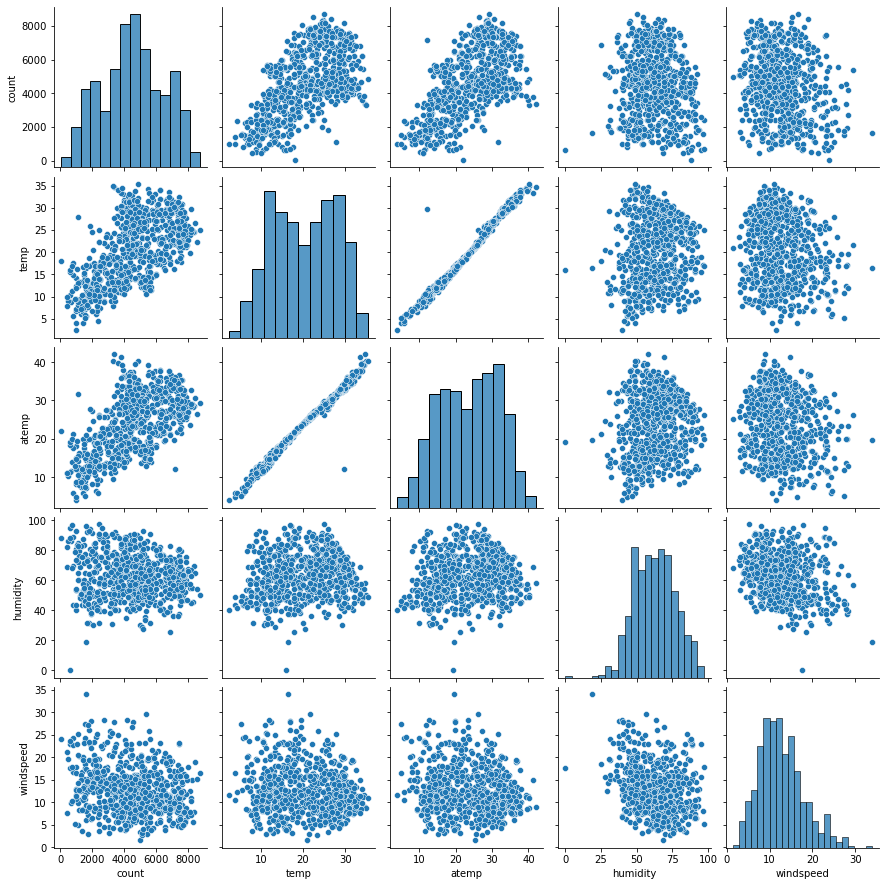

In [21]:
#numerical features visualization
sns.pairplot(data=df_boombikes,vars=['count', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

In [22]:
#dropping temp to avoid collinearity with atemp
df_boombikes.drop(['temp'],axis=1,inplace=True)
df_boombikes.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count,day
0,spring,0,Jan,0,Mon,1,Avergae,18.18125,80.5833,10.749882,985,01
1,spring,0,Jan,0,Tue,1,Avergae,17.68695,69.6087,16.652113,801,02
2,spring,0,Jan,0,Wed,1,Good,9.47025,43.7273,16.636703,1349,03
3,spring,0,Jan,0,Thu,1,Good,10.60610,59.0435,10.739832,1562,04
4,spring,0,Jan,0,Fri,1,Good,11.46350,43.6957,12.522300,1600,05
5,spring,0,Jan,0,Sat,0,Good,11.66045,51.8261,6.000868,1606,06
6,spring,0,Jan,0,Sun,0,Avergae,10.44195,49.8696,11.304642,1510,07
7,spring,0,Jan,0,Mon,1,Avergae,8.11270,53.5833,17.875868,959,08
8,spring,0,Jan,0,Tue,1,Good,5.80875,43.4167,24.250650,822,09
9,spring,0,Jan,0,Wed,1,Good,7.54440,48.2917,14.958889,1321,10


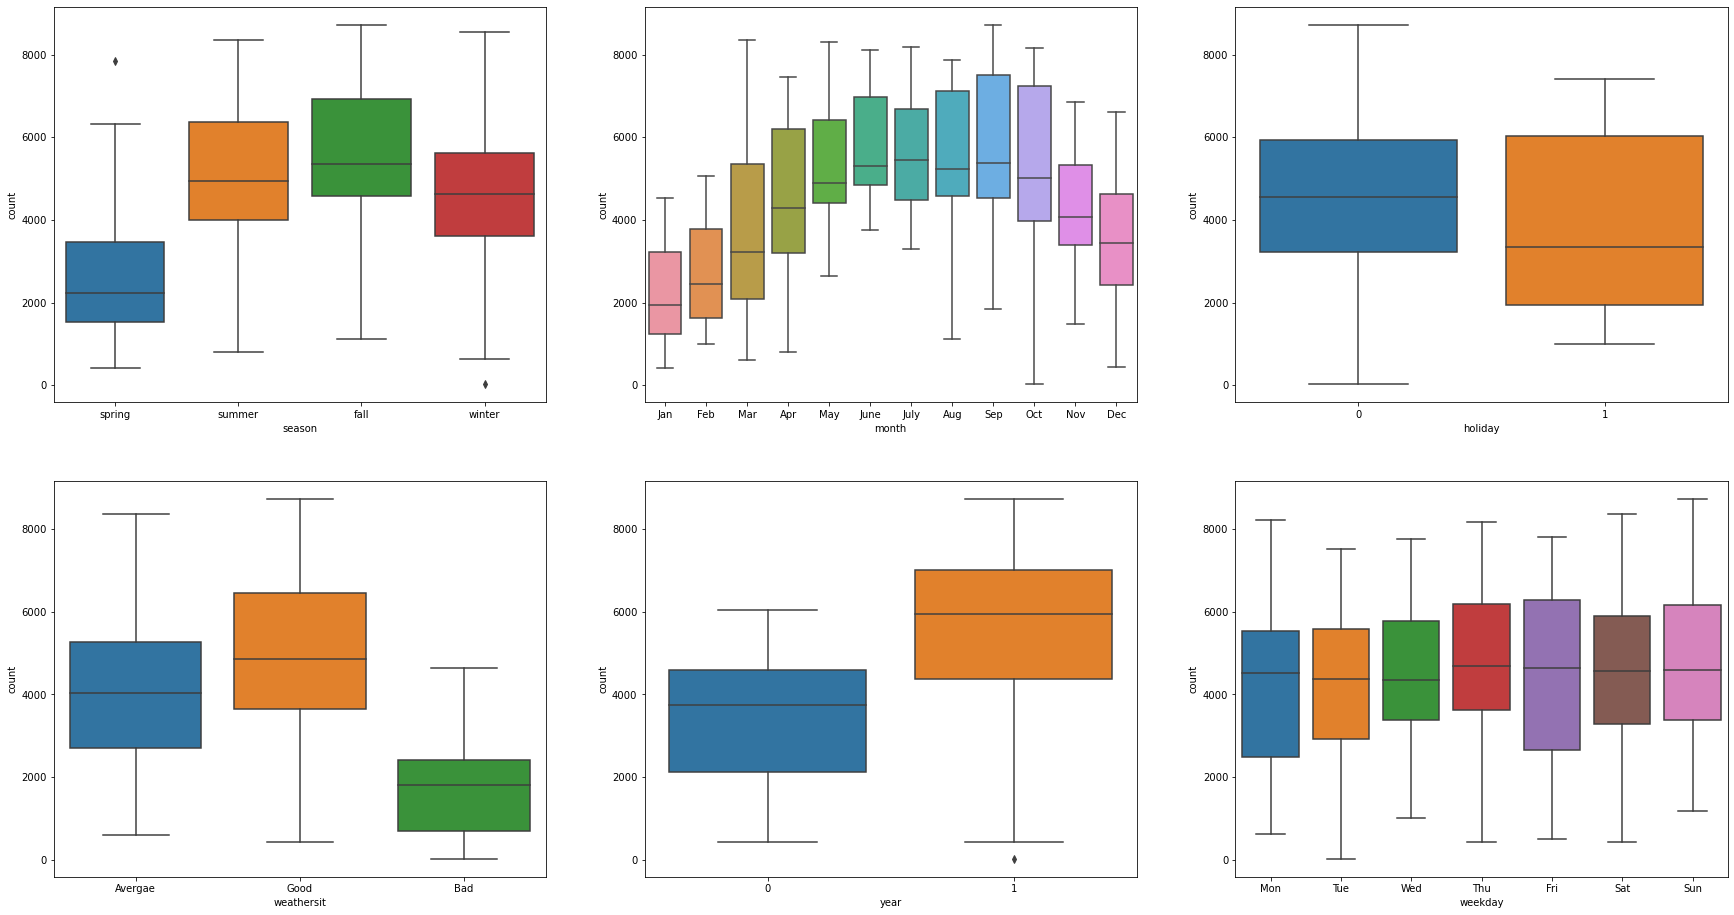

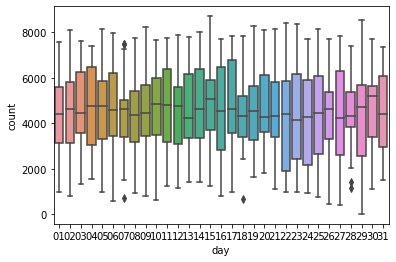

In [23]:
#categorical features
plt.figure(figsize=(30, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = df_boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = df_boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'count', data = df_boombikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df_boombikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'year', y = 'count', data = df_boombikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = df_boombikes)
plt.show()
sns.boxplot(x = 'day', y = 'count', data = df_boombikes)
plt.show()

#### 4.0 Data Preparation for modelling

In [24]:
#encoding categorical to behave like numberical(creating dummies)
df_dummy = df_boombikes[['season','month','weekday','weathersit']]
df_dummy = pd.get_dummies(df_dummy,drop_first=True )
df_boombikes = pd.concat([df_dummy,df_boombikes],axis = 1)
df_boombikes.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,count,day
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Mon,1,Avergae,18.18125,80.5833,10.749882,985,01
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tue,1,Avergae,17.68695,69.6087,16.652113,801,02
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wed,1,Good,9.47025,43.7273,16.636703,1349,03
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thu,1,Good,10.60610,59.0435,10.739832,1562,04
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Fri,1,Good,11.46350,43.6957,12.522300,1600,05


In [25]:
#dropping features converted to dummies
df_boombikes.drop(['season', 'month', 'weekday','weathersit'], axis = 1, inplace = True)
df_boombikes.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,count,day
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,18.18125,80.5833,10.749882,985,01
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,17.68695,69.6087,16.652113,801,02
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,9.47025,43.7273,16.636703,1349,03
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,10.60610,59.0435,10.739832,1562,04
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,11.46350,43.6957,12.522300,1600,05


In [26]:
#split dataset into test and train
df_train, df_test = train_test_split(df_boombikes, train_size = 0.7, test_size = 0.3, random_state = 10)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [27]:
#rescaling numberical features of training data set
minmaxscaler = MinMaxScaler()
scale_vars = ['count','humidity','windspeed','atemp','day']
df_train[scale_vars] = minmaxscaler.fit_transform(df_train[scale_vars])
df_train.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,count,day
323,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.480765,0.634717,0.337184,0.372933,0.633333
72,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.311594,0.394939,0.236118,0.194978,0.433333
510,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.731886,0.695953,0.364071,0.737052,0.833333
700,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0.348399,0.812033,0.210252,0.509236,0.033333
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.613206,0.912672,0.217975,0.526862,0.700000


In [28]:
df_train.describe()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,count,day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.247059,0.256863,0.260784,0.076471,0.094118,0.076471,0.086275,0.068627,0.072549,0.084314,...,0.033333,0.621569,0.507843,0.033333,0.698039,0.497849,0.564620,0.343339,0.492266,0.491765
std,0.431725,0.437332,0.439494,0.266010,0.292279,0.266010,0.281045,0.253068,0.259649,0.278131,...,0.179682,0.485472,0.500429,0.179682,0.459559,0.213742,0.183343,0.162447,0.235984,0.294736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.319432,0.427182,0.227237,0.326754,0.233333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.502990,0.563897,0.323711,0.490945,0.500000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.672738,0.698806,0.434281,0.675812,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_test.describe()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weekday_Wed,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.246575,0.242009,0.200913,0.105023,0.063927,0.077626,0.082192,0.123288,0.105023,0.086758,...,0.109589,0.018265,0.666667,0.484018,0.018265,0.675799,24.278975,62.123168,13.042319,4516.639269
std,0.432005,0.429281,0.401601,0.307285,0.245183,0.268194,0.275286,0.329520,0.307285,0.282125,...,0.313092,0.134214,0.472484,0.500889,0.134214,0.469148,8.714110,13.831977,4.983520,1895.411319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.760725,51.729150,9.604316,3226.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,25.662100,62.375000,12.334164,4661.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,31.912925,72.104200,15.730360,5857.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.214350,94.826100,29.584721,8167.000000


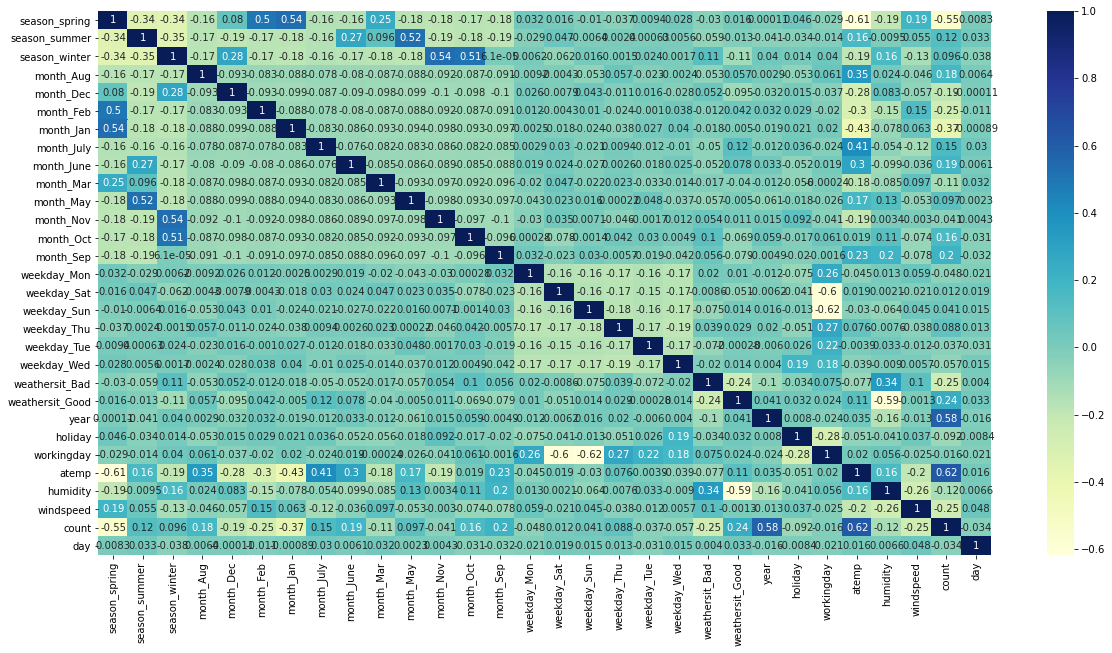

In [30]:
#correlation matrix for trin data set
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### 5.0 Selecting the correct data model(Test and Train)

In [31]:
#seperating dependent and independent features
y_train = df_train.pop('count')
x_train = df_train

In [32]:
y_train.head()

323    0.372933
72     0.194978
510    0.737052
700    0.509236
264    0.526862
Name: count, dtype: float64

In [33]:
x_train.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weekday_Wed,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,day
323,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.480765,0.634717,0.337184,0.633333
72,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0.311594,0.394939,0.236118,0.433333
510,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.731886,0.695953,0.364071,0.833333
700,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.348399,0.812033,0.210252,0.033333
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.613206,0.912672,0.217975,0.700000


#### RFE to determine the most dependent features

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [35]:
#select top 13 features from RFE
rfe = RFE(lr, 13)
rfe = rfe.fit(x_train, y_train)

In [36]:
#display the selected features
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 17),
 ('season_winter', True, 1),
 ('month_Aug', False, 14),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 15),
 ('month_Mar', False, 9),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 16),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 6),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 12),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', False, 3),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('day', False, 10)]

In [37]:
col = x_train.columns[rfe.support_]
col

Index(['season_spring', 'season_winter', 'month_Dec', 'month_Jan',
       'month_July', 'month_Nov', 'month_Sep', 'weathersit_Bad', 'year',
       'holiday', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [38]:
x_train.columns[~rfe.support_]

Index(['season_summer', 'month_Aug', 'month_Feb', 'month_June', 'month_Mar',
       'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Good',
       'workingday', 'day'],
      dtype='object')

In [39]:
#keep the columns from RFE
x_train_rfe = x_train[col]

In [40]:
#add constant to the independent features
x_train_rfe = sm.add_constant(x_train_rfe)

In [41]:
#fit the model
lr = sm.OLS(y_train,x_train_rfe).fit()

In [42]:
lr.params

const             0.356686
season_spring    -0.116334
season_winter     0.087506
month_Dec        -0.058955
month_Jan        -0.043129
month_July       -0.071859
month_Nov        -0.071447
month_Sep         0.058890
weathersit_Bad   -0.144646
year              0.242337
holiday          -0.076434
atemp             0.499648
humidity         -0.252685
windspeed        -0.188744
dtype: float64

In [43]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.40e-189
Time:                        05:07:43   Log-Likelihood:                 484.31
No. Observations:                 510   AIC:                            -940.6
Df Residuals:                     496   BIC:                            -881.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3567      0.029     12.136      0.000       0.299       0.414
season_spring     -0.1163      0.016     -7.221      0.000      -0.148      -0.085
season_winter      0.0875      0.014      6.144      0.000       0.060       0.115
month_Dec         -0.0590      0.017     -3.405      0.001      -0.093      -0.025
month_Jan         -0.0431      0.019     -2.302      0.022      -0.080      -0.006
month_July        -0.0719      0.019     -3.760      0.000      -0.109      -0.034
month_Nov         -0.0714      0.019     -3.744      0.000      -0.109      -0.034
month_Sep          0.0589      0.016      3.755      0.000       0.028       0.090
weathersit_Bad    -0.1446      0.026     -5.607      0.000      -0.195      -0.094
year               0.2423      0.009     28.147      0.000       0.225       0.259
holiday           -0.0764      0.024     -3.232      0.001      -0.123      -0.030
atemp              0.4996      0.035     14.188      0.000       0.430       0.569
humidity          -0.2527      0.027     -9.291      0.000      -0.306      -0.199
windspeed         -0.1887      0.028     -6.688      0.000      -0.244      -0.133
==============================================================================
Omnibus:                       66.990   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.174
Skew:                          -0.712   Prob(JB):                     4.05e-33
Kurtosis:                       5.234   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#determine VIF values of selected columns via RFE
vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.89
11,atemp,3.20
1,season_spring,2.73
2,season_winter,2.21
6,month_Nov,1.72
4,month_Jan,1.57
3,month_Dec,1.45
12,humidity,1.40
5,month_July,1.32
8,weathersit_Bad,1.21


#### Model 2

In [45]:
#condition of high P value and low VIF eliminating 'month_Jan'
x_train_new = x_train_rfe.drop(["month_Jan"], axis = 1)

In [46]:
x_train_new.head()

,const,season_spring,season_winter,month_Dec,month_July,month_Nov,month_Sep,weathersit_Bad,year,holiday,atemp,humidity,windspeed
323,1.0,0,1,0,0,1,0,0,0,0,0.480765,0.634717,0.337184
72,1.0,1,0,0,0,0,0,0,0,0,0.311594,0.394939,0.236118
510,1.0,0,0,0,0,0,0,0,1,0,0.731886,0.695953,0.364071
700,1.0,0,1,1,0,0,0,0,1,0,0.348399,0.812033,0.210252
264,1.0,0,0,0,0,0,1,0,0,0,0.613206,0.912672,0.217975


In [47]:
x_train_new = sm.add_constant(x_train_new)
lr = sm.OLS(y_train, x_train_new)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.19e-189
Time:                        05:07:43   Log-Likelihood:                 481.60
No. Observations:                 510   AIC:                            -937.2
Df Residuals:                     497   BIC:                            -882.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3447      0.029     11.866      0.000       0.288       0.402
season_spring     -0.1261      0.016     -8.073      0.000      -0.157      -0.095
season_winter      0.0876      0.014      6.121      0.000       0.059       0.116
month_Dec         -0.0489      0.017     -2.907      0.004      -0.082      -0.016
month_July        -0.0758      0.019     -3.967      0.000      -0.113      -0.038
month_Nov         -0.0664      0.019     -3.488      0.001      -0.104      -0.029
month_Sep          0.0587      0.016      3.730      0.000       0.028       0.090
weathersit_Bad    -0.1427      0.026     -5.511      0.000      -0.194      -0.092
year               0.2424      0.009     28.038      0.000       0.225       0.259
holiday           -0.0766      0.024     -3.224      0.001      -0.123      -0.030
atemp              0.5203      0.034     15.214      0.000       0.453       0.588
humidity          -0.2570      0.027     -9.430      0.000      -0.311      -0.203
windspeed         -0.1842      0.028     -6.515      0.000      -0.240      -0.129
==============================================================================
Omnibus:                       63.397   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.068
Skew:                          -0.687   Prob(JB):                     1.72e-30
Kurtosis:                       5.136   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.35
10,atemp,2.99
1,season_spring,2.55
2,season_winter,2.21
5,month_Nov,1.70
11,humidity,1.40
3,month_Dec,1.36
4,month_July,1.31
7,weathersit_Bad,1.21
12,windspeed,1.18


#### Model 3

In [49]:
#condition of high P value and low VIF eliminating 'month_Dec'
x_train_new = x_train_new.drop(["month_Dec"], axis = 1)
x_train_new.head()

,const,season_spring,season_winter,month_July,month_Nov,month_Sep,weathersit_Bad,year,holiday,atemp,humidity,windspeed
323,1.0,0,1,0,1,0,0,0,0,0.480765,0.634717,0.337184
72,1.0,1,0,0,0,0,0,0,0,0.311594,0.394939,0.236118
510,1.0,0,0,0,0,0,0,1,0,0.731886,0.695953,0.364071
700,1.0,0,1,0,0,0,0,1,0,0.348399,0.812033,0.210252
264,1.0,0,0,0,0,1,0,0,0,0.613206,0.912672,0.217975


In [50]:
x_train_new = sm.add_constant(x_train_new)
lr = sm.OLS(y_train, x_train_new)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          9.09e-189
Time:                        05:07:43   Log-Likelihood:                 477.30
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     498   BIC:                            -879.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3319      0.029     11.473      0.000       0.275       0.389
season_spring     -0.1247      0.016     -7.932      0.000      -0.156      -0.094
season_winter      0.0740      0.014      5.431      0.000       0.047       0.101
month_July        -0.0795      0.019     -4.135      0.000      -0.117      -0.042
month_Nov         -0.0465      0.018     -2.597      0.010      -0.082      -0.011
month_Sep          0.0630      0.016      3.985      0.000       0.032       0.094
weathersit_Bad    -0.1416      0.026     -5.428      0.000      -0.193      -0.090
year               0.2430      0.009     27.906      0.000       0.226       0.260
holiday           -0.0791      0.024     -3.307      0.001      -0.126      -0.032
atemp              0.5426      0.034     16.158      0.000       0.477       0.609
humidity          -0.2627      0.027     -9.596      0.000      -0.317      -0.209
windspeed         -0.1803      0.028     -6.337      0.000      -0.236      -0.124
==============================================================================
Omnibus:                       59.621   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.978
Skew:                          -0.674   Prob(JB):                     8.85e-27
Kurtosis:                       4.957   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.27
9,atemp,2.84
1,season_spring,2.54
2,season_winter,1.98
4,month_Nov,1.48
10,humidity,1.39
3,month_July,1.30
6,weathersit_Bad,1.21
11,windspeed,1.18
5,month_Sep,1.13


#### Model 4

In [52]:
#Hit and trail to find least impact on adjusted R^2 by removing 'month_Nov'
x_train_new = x_train_new.drop(["month_Nov"], axis = 1)
x_train_new.head()

,const,season_spring,season_winter,month_July,month_Sep,weathersit_Bad,year,holiday,atemp,humidity,windspeed
323,1.0,0,1,0,0,0,0,0,0.480765,0.634717,0.337184
72,1.0,1,0,0,0,0,0,0,0.311594,0.394939,0.236118
510,1.0,0,0,0,0,0,1,0,0.731886,0.695953,0.364071
700,1.0,0,1,0,0,0,1,0,0.348399,0.812033,0.210252
264,1.0,0,0,0,1,0,0,0,0.613206,0.912672,0.217975


In [53]:
x_train_new = sm.add_constant(x_train_new)
lr = sm.OLS(y_train, x_train_new)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.9
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.57e-188
Time:                        05:07:43   Log-Likelihood:                 473.87
No. Observations:                 510   AIC:                            -925.7
Df Residuals:                     499   BIC:                            -879.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3230      0.029     11.180      0.000       0.266       0.380
season_spring     -0.1194      0.016     -7.617      0.000      -0.150      -0.089
season_winter      0.0599      0.013      4.767      0.000       0.035       0.085
month_July        -0.0811      0.019     -4.198      0.000      -0.119      -0.043
month_Sep          0.0663      0.016      4.189      0.000       0.035       0.097
weathersit_Bad    -0.1418      0.026     -5.406      0.000      -0.193      -0.090
year               0.2431      0.009     27.758      0.000       0.226       0.260
holiday           -0.0849      0.024     -3.547      0.000      -0.132      -0.038
atemp              0.5545      0.033     16.574      0.000       0.489       0.620
humidity          -0.2593      0.028     -9.427      0.000      -0.313      -0.205
windspeed         -0.1830      0.029     -6.398      0.000      -0.239      -0.127
==============================================================================
Omnibus:                       57.114   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.176
Skew:                          -0.660   Prob(JB):                     7.22e-25
Kurtosis:                       4.869   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.62
8,atemp,2.79
1,season_spring,2.50
2,season_winter,1.67
9,humidity,1.39
3,month_July,1.30
5,weathersit_Bad,1.21
10,windspeed,1.18
4,month_Sep,1.12
6,year,1.05


Best fitted line is:

count = 0.3230 - 0.5545 X atemp - 0.1194 X season_spring - 0.0599 X season_winter - 0.2593 X humidity - 0.0811 X month_July 
-0.1418 X weathersit_Bad - 0.1830 X windspeed + 0.0663 X month_Sep + 0.2431 X year - 0.0849 X holiday


#### 6.0 Residual anlysis on train data

In [55]:
y_train_cnt = lr_model.predict(x_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

Text(0.5, 0, 'Errors')

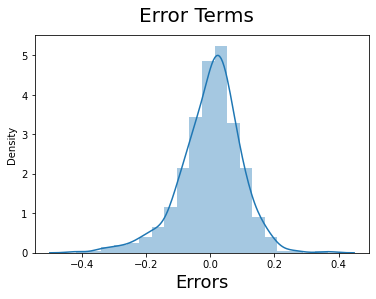

In [56]:
#distribution of error
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

In [57]:
#predictions and evaluatin on test set
scale_vars = ['count','humidity','windspeed','atemp','day']
df_test[scale_vars] = minmaxscaler.transform(df_test[scale_vars])
df_test.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,...,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,count,day
566,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0.606373,0.865815,0.393568,0.486297,0.666667
374,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0.293773,0.586077,0.340487,0.382349,0.300000
181,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0.744691,0.266240,0.165370,0.595316,0.000000
529,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0.707113,0.487752,0.476922,0.836895,0.433333
233,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0.725877,0.360489,0.524373,0.522395,0.700000


In [58]:
y_test = df_test.pop('count')
x_test = df_test

In [59]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,weekday_Wed,weathersit_Bad,weathersit_Good,year,holiday,workingday,atemp,humidity,windspeed,day
566,1.0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0.606373,0.865815,0.393568,0.666667
374,1.0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0.293773,0.586077,0.340487,0.300000
181,1.0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0.744691,0.266240,0.165370,0.000000
529,1.0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.707113,0.487752,0.476922,0.433333
233,1.0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0.725877,0.360489,0.524373,0.700000


In [60]:
cls = x_train_new.columns

In [61]:
x_test_sm = x_test_sm[cls]

In [62]:
y_test_pred = lr_model.predict(x_test_sm)

In [63]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8052708280481697